1) Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data= pd.read_csv("D://Data Science-Ayesha//50_Startups (2).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#checking for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Data correlation

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

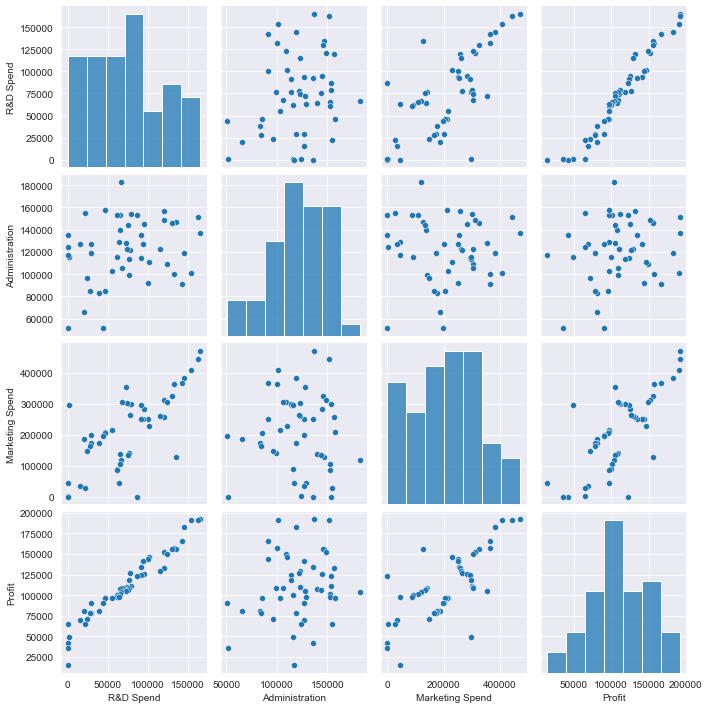

In [7]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

# preparing model

In [8]:
data1 = data.rename({'R&D Spend':'RDS','Administration':'Adm', 'Marketing Spend':'MS','State':'S','Profit' : 'P'},axis=1)
data1.head()

,RDS,Adm,MS,S,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
model=smf.ols('P~RDS+Adm+MS+S',data=data1).fit()
model

In [10]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248987
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796105
24    113294.373453
25    102200.268919
26    110765.301169
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358948
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746175
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [11]:
#beta coeffiecients
model.params

Intercept        50125.343832
S[T.Florida]       198.788793
S[T.New York]      -41.887019
RDS                  0.806023
Adm                 -0.027004
MS                   0.026980
dtype: float64

In [12]:
#p value& t value
print(model.tvalues ,'\n', model.pvalues)

Intercept         7.280560
S[T.Florida]      0.058970
S[T.New York]    -0.012864
RDS              17.368580
Adm              -0.517012
MS                1.573889
dtype: float64 
 Intercept        4.444178e-09
S[T.Florida]     9.532429e-01
S[T.New York]    9.897941e-01
RDS              2.578772e-21
Adm              6.077373e-01
MS               1.226769e-01
dtype: float64


In [13]:
model.rsquared ,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)


# simple linear regression models

In [14]:
P_RDS= smf.ols('P~RDS',data=data1).fit()
#p values &t values
print(P_RDS.pvalues, '\n',P_RDS.tvalues)

Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64 
 Intercept    19.320288
RDS          29.151139
dtype: float64


In [15]:
P_Adm = smf.ols('P~Adm',data=data1).fit()
print(P_Adm.pvalues,'\n',P_Adm.tvalues)

Intercept    0.003824
Adm          0.162217
dtype: float64 
 Intercept    3.040044
Adm          1.419493
dtype: float64


In [16]:
P_MS= smf.ols('P~MS',data=data1).fit()
print(P_MS.pvalues,'\n', P_MS.tvalues)

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64 
 Intercept    7.808356
MS           7.802657
dtype: float64


In [17]:
P_S=smf.ols('P~S',data=data1).fit()
print(P_S.pvalues,'\n',P_S.tvalues)

Intercept        5.774813e-14
S[T.Florida]     2.991510e-01
S[T.New York]    4.834492e-01
dtype: float64 
 Intercept        10.536302
S[T.Florida]      1.049860
S[T.New York]     0.706364
dtype: float64


In [18]:
P_AdmMS = smf.ols('P~Adm+MS',data=data1).fit()
print(P_AdmMS.pvalues,'\n',P_AdmMS.tvalues)

Intercept    2.589341e-01
Adm          1.729198e-02
MS           9.727245e-11
dtype: float64 
 Intercept    1.142741
Adm          2.467779
MS           8.281039
dtype: float64


# calculating VIF 

In [19]:
rsq_RDS = smf.ols('RDS~Adm+MS',data=data1).fit().rsquared
vif_RDS = 1/(1-rsq_RDS)

rsq_Adm = smf.ols('Adm~RDS+MS',data=data1).fit().rsquared
vif_Adm = 1/(1-rsq_Adm)

rsq_MS = smf.ols('MS~RDS+Adm',data=data1).fit().rsquared
vif_MS = 1/(1-rsq_MS)

#storing vif values in adata frame
d1={'variables': ['RDS','Adm','MS'],'VIF':[vif_RDS,vif_Adm,vif_MS]}
vif_frame = pd.DataFrame(d1)
vif_frame


,variables,VIF
0,RDS,2.468903
1,Adm,1.175091
2,MS,2.326773


In [20]:
data1['predicted'] = model.fittedvalues
data1['errors'] = model.resid
data1

,RDS,Adm,MS,S,P,predicted,errors
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571365,-128.741365
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133819,-6089.193819
5,131876.90,99814.71,362861.36,New York,156991.12,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,California,156122.51,158099.292788,-1976.782788
7,130298.13,145530.06,323876.68,Florida,155752.60,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,New York,152211.77,151634.743327,577.026673
9,123334.88,108679.17,304981.62,California,149759.96,154829.662529,-5069.702529


# Residual Analysis

In [21]:
model.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782788
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101013
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806105
24    -4742.333453
25     5204.071081
26    -5031.761169
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396604
33    -1282.438948
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163825
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

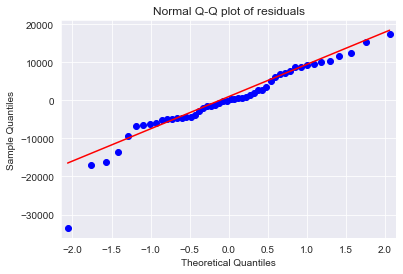

In [22]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [23]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='errors'>

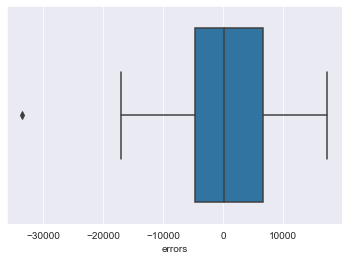

In [24]:
sns.boxplot(data1['errors'])

<AxesSubplot:xlabel='errors', ylabel='Count'>

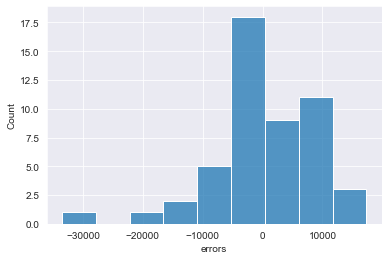

In [25]:
sns.histplot(data1['errors'])

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='errors', ylabel='Density'>

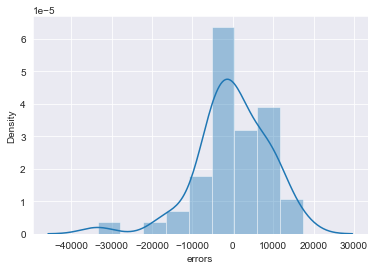

In [26]:
sns.distplot(data1['errors'])

# Residual plot for Homoscedasticity

In [27]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

0     2.045180
1     1.960723
2     1.787824
3     1.566680
4     1.533402
5     1.309406
6     1.172654
7     1.224977
8     1.008166
9     1.089460
10    0.601814
11    0.598353
12    0.439434
13    0.392319
14    0.958795
15    0.868448
16    0.123188
17    0.459853
18    0.436045
19    0.091131
20    0.115979
21    0.132028
22    0.071771
23   -0.048061
24    0.032613
25   -0.249671
26   -0.031738
27    0.057687
28   -0.259383
29   -0.261865
30   -0.315096
31   -0.366283
32   -0.331400
33   -0.354984
34   -0.586190
35   -0.549415
36   -0.931004
37   -0.570847
38   -1.079004
39   -0.720784
40   -0.947806
41   -0.942881
42   -1.054336
43   -1.320886
44   -1.206771
45   -1.639246
46   -1.418270
47   -1.667747
48   -1.600196
49   -1.624064
dtype: float64
0    -0.014393
1     0.304175
2     0.980943
3     1.041629
4    -0.680763
5    -0.724755
6    -0.221001
7    -0.492254
8     0.064511
9    -0.566785
10    1.169112
11    0.976091
12    1.375413
13    0.768738
14   -1.910831
15   -1.81

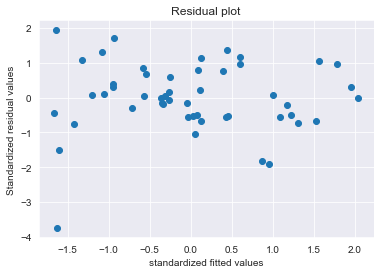

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))


print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

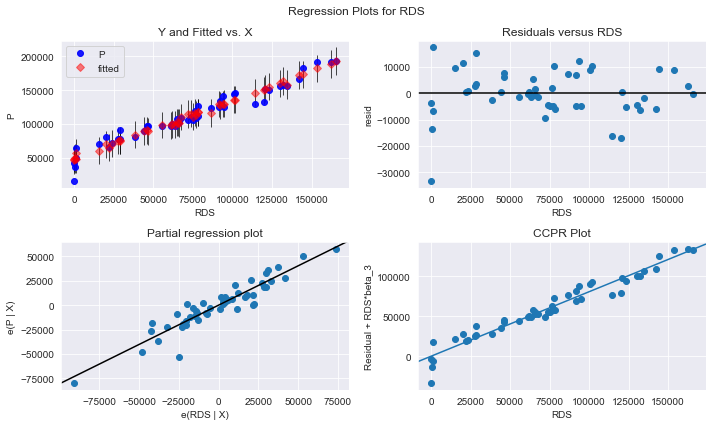

In [29]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

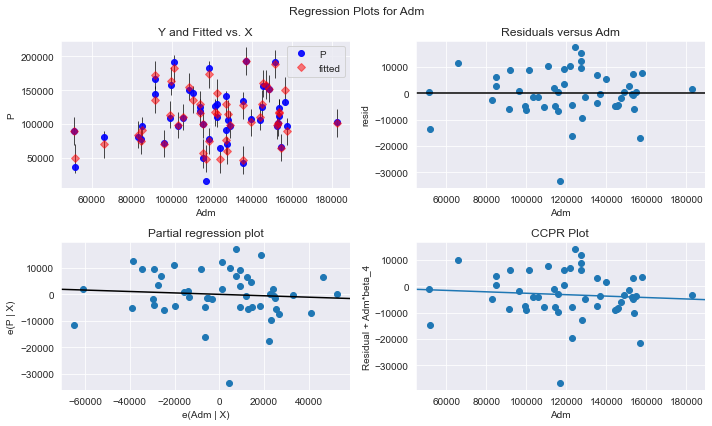

In [30]:
fig=plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'Adm',fig=fig)
plt.show()

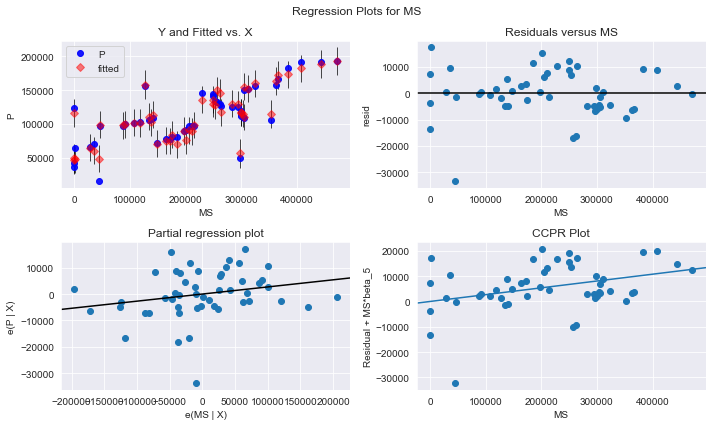

In [31]:
fig= plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

# Detecting influencers/outliers
#Cook's Distance

In [32]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

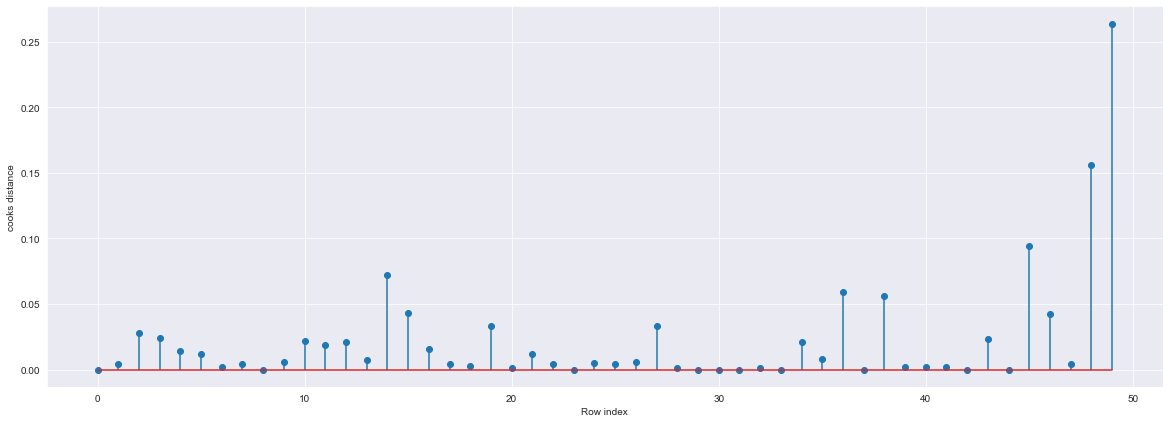

In [33]:
#plot the influencers values using stem plot
fig  = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.26395943587041654)

# High influence points

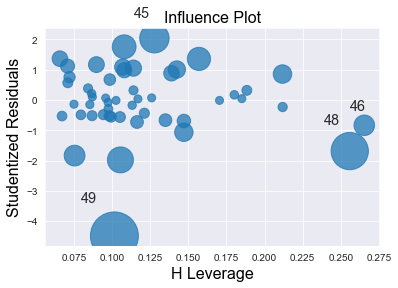

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
data1.shape

(50, 7)

In [37]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff  = 3*((k+1)/n)
leverage_cutoff

0.48

In [38]:
#from the above influencer plot, we can say that 48,49 are the influencers
data1[data1.index.isin([48,49])]

,RDS,Adm,MS,S,P,predicted,errors
48,542.05,51743.15,0.00,New York,35673.41,49123.073082,-13449.663082
49,0.00,116983.80,45173.06,California,14681.40,48185.038791,-33503.638791


In [39]:
data1.head()

,RDS,Adm,MS,S,P,predicted,errors
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571365,-128.741365
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133819,-6089.193819


# Improving the model

In [40]:
data_new = data
data2 = data1.drop(data.index[[48,49]],axis = 0).reset_index()

In [41]:
data2=data2.drop(['index'],axis=1)

In [42]:
data2

,RDS,Adm,MS,S,P,predicted,errors
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571365,-128.741365
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133819,-6089.193819
5,131876.90,99814.71,362861.36,New York,156991.12,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,California,156122.51,158099.292788,-1976.782788
7,130298.13,145530.06,323876.68,Florida,155752.60,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,New York,152211.77,151634.743327,577.026673
9,123334.88,108679.17,304981.62,California,149759.96,154829.662529,-5069.702529


#Build new model 

In [43]:
final_m_r = smf.ols('P~RDS+Adm+MS',data = data2).fit()

In [44]:
final_m_r.rsquared,final_m_r.aic

(0.9626766170294073, 994.6690439260116)

In [45]:
new_data= pd.DataFrame({'RDS':80000, 'Adm' :120000, 'MS':140000},index = [0])
new_data

,RDS,Adm,MS
0,80000,120000,140000


In [46]:
final_m_r.predict(new_data)

0    117021.510953
dtype: float64

In [47]:
pred_y=final_m_r.predict(data2)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [48]:
d2={'Prep_Models':['model','final_m_r'],'Rsquared':[model.rsquared,final_m_r.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model,0.950752
1,final_m_r,0.962677


2)Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [50]:
data = pd.read_csv ("D:\\Data Science-Ayesha\\ToyotaCorolla (2).csv", encoding = 'latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [51]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [53]:
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
data1= pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [54]:
data2= data1.rename({'Age_08_04':'Age', 'cc': 'C', 'Quarterly_Tax':'QT'},axis =1)
data2

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [55]:
data2[data2.duplicated()]

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [56]:
data3=data2.drop_duplicates().reset_index(drop=True)
data3

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [57]:
data3.describe()

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [58]:
#corelation
data3.corr()

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
C,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


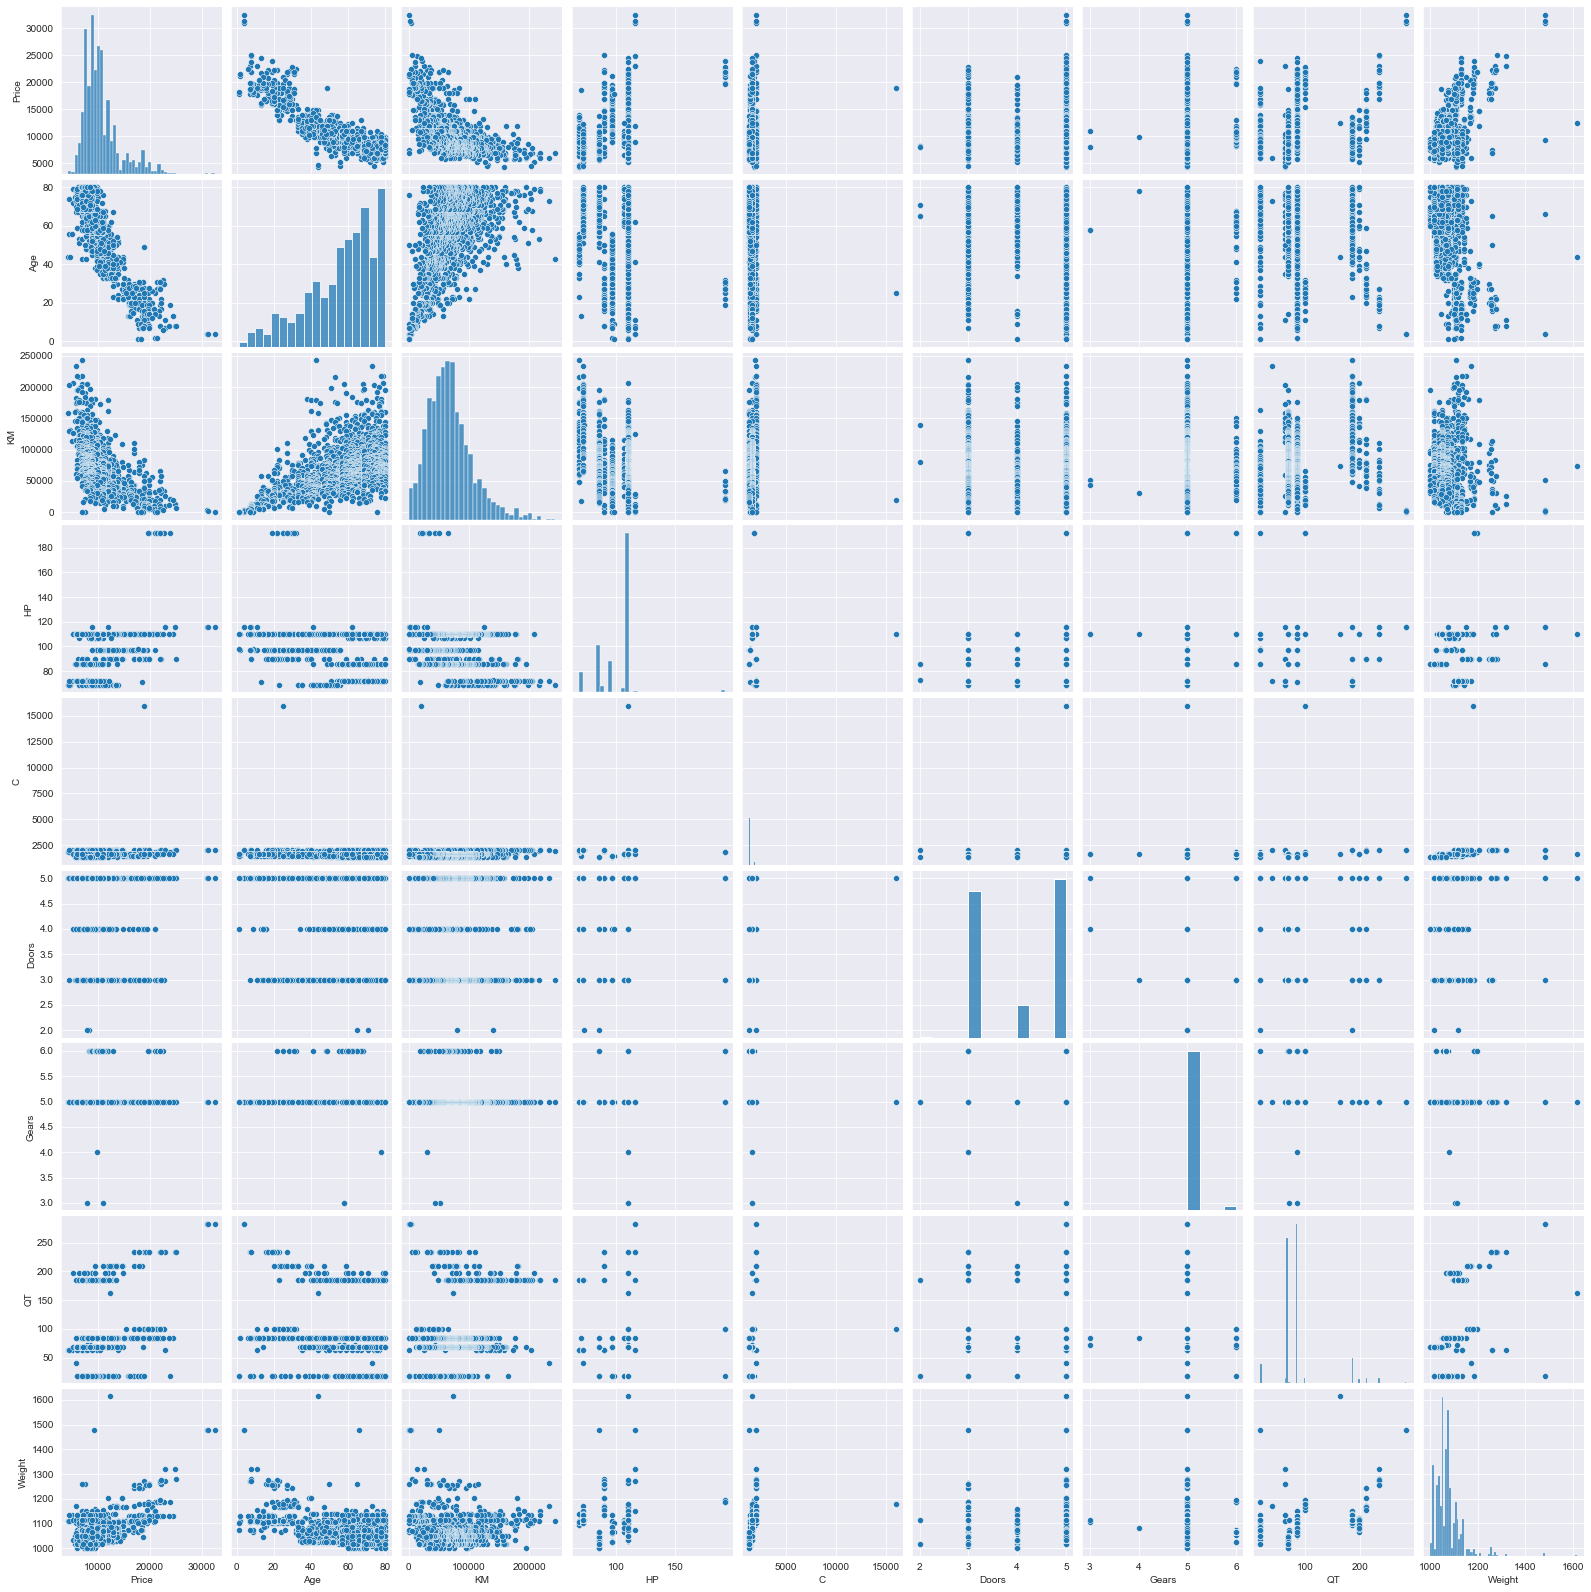

In [59]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

In [60]:
data3.isnull().sum()

Price     0
Age       0
KM        0
HP        0
C         0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [61]:
data3.shape

(1435, 9)

In [62]:
model=smf.ols('Price~Age+KM+HP+C+Doors+Gears+QT+Weight',data=data3).fit()

In [63]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
C              -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [64]:
model.pvalues,'\n',model.tvalues

(Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 C             1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64,
 '\n',
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 C            -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64)

In [65]:
model.rsquared,model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [66]:
ml_a= smf.ols('Price~Age',data=data3).fit()
print(ml_a.tvalues,'\n',ml_a.pvalues)

Intercept    138.818198
Age          -68.846693
dtype: float64 
 Intercept    0.0
Age          0.0
dtype: float64


In [67]:
ml_k=smf.ols('Price~KM',data=data3).fit()
print(ml_k.tvalues ,'\n',ml_k.pvalues)

Intercept    88.643156
KM          -26.221579
dtype: float64 
 Intercept     0.000000e+00
KM           4.117214e-124
dtype: float64


In [68]:
ml_ak=smf.ols('Price~Age+KM',data=data3).fit()
ml_ak.tvalues,'\n',ml_ak.pvalues

(Intercept    146.207406
 Age          -56.276050
 KM           -12.161288
 dtype: float64,
 '\n',
 Intercept    0.000000e+00
 Age          0.000000e+00
 KM           1.872211e-32
 dtype: float64)

# Calculating VIF

In [69]:
rsq_a=smf.ols('Age~KM+HP+C+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_k=smf.ols('KM~Age+HP+C+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_k = 1/(1-rsq_k)

rsq_h=smf.ols('HP~Age+KM+C+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_h= 1/(1-rsq_h)

rsq_c = smf.ols('C~Age+KM+HP+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_c=1/(1-rsq_c)

rsq_d=smf.ols('Doors~Age+KM+HP+C+Gears+QT+Weight',data=data3).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=smf.ols('Gears~Age+KM+HP+C+Doors+QT+Weight',data=data3).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_q=smf.ols('QT~Age+KM+HP+C+Doors+Gears+Weight',data=data3).fit().rsquared
vif_q=1/(1-rsq_g)

rsq_w=smf.ols('Weight~Age+KM+HP+C+Doors+Gears+QT',data=data3).fit().rsquared
vif_w=1/(1-rsq_w)

#storing vif values in data frame
d1={'Variables':['Age','KM','HP','C','Doors','Gears','QT','Weight'],'VIF':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,C,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,1.098843
7,Weight,2.487180


In [70]:
data3['Predicted']= model.fittedvalues
data3['Errors']=model.resid
data3

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


Residual Analysis 

# Test for Normality of Residuals(Q-Q plot)

In [71]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

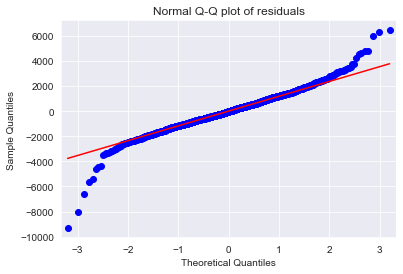

In [72]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [73]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

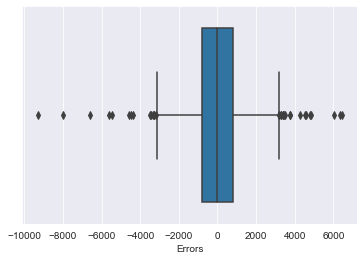

In [74]:
sns.boxplot(data3['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Count'>

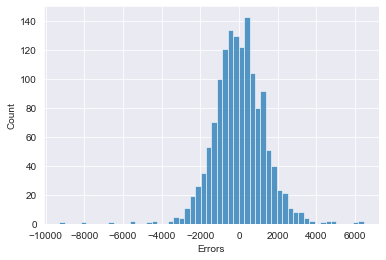

In [75]:
sns.histplot(data3["Errors"])

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Errors', ylabel='Density'>

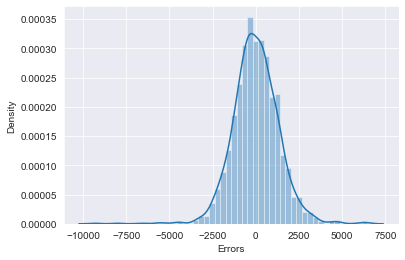

In [76]:
sns.distplot(data3['Errors'])

# Residual plot for Homoscedasticity

In [77]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

0       1.811440
1       1.650868
2       1.807763
3       1.696217
4       1.634880
          ...   
1430   -0.574865
1431   -0.724552
1432   -0.675960
1433   -0.639025
1434   -0.096920
Length: 1435, dtype: float64
0      -2.460254
1      -1.871222
2      -2.114735
3      -1.087988
4      -1.831176
          ...   
1430   -0.967265
1431    1.907560
1432    0.033306
1433   -0.993398
1434   -2.575442
Length: 1435, dtype: float64


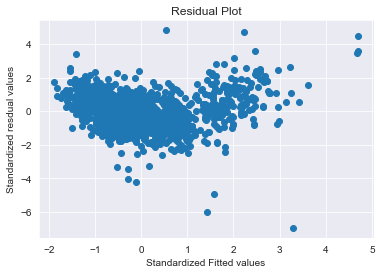

In [78]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized resdual values')
plt.show()

# Residual Vs Regressors

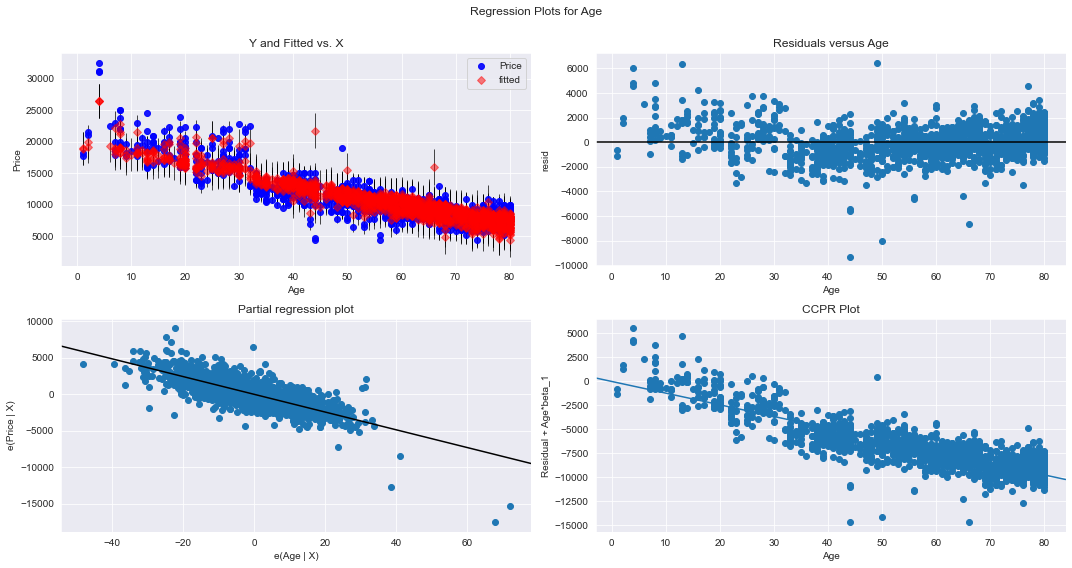

In [79]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

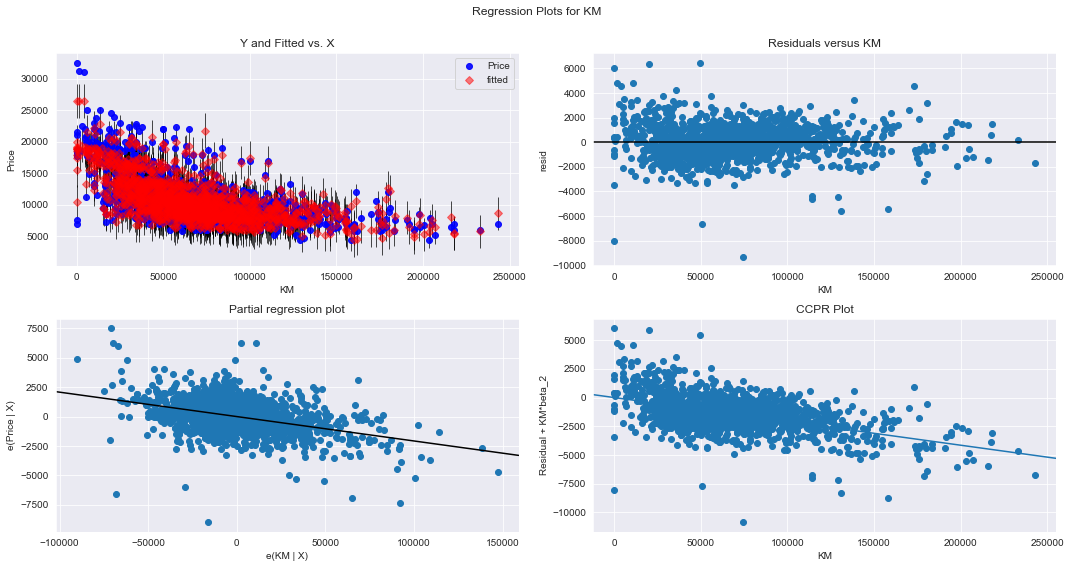

In [80]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

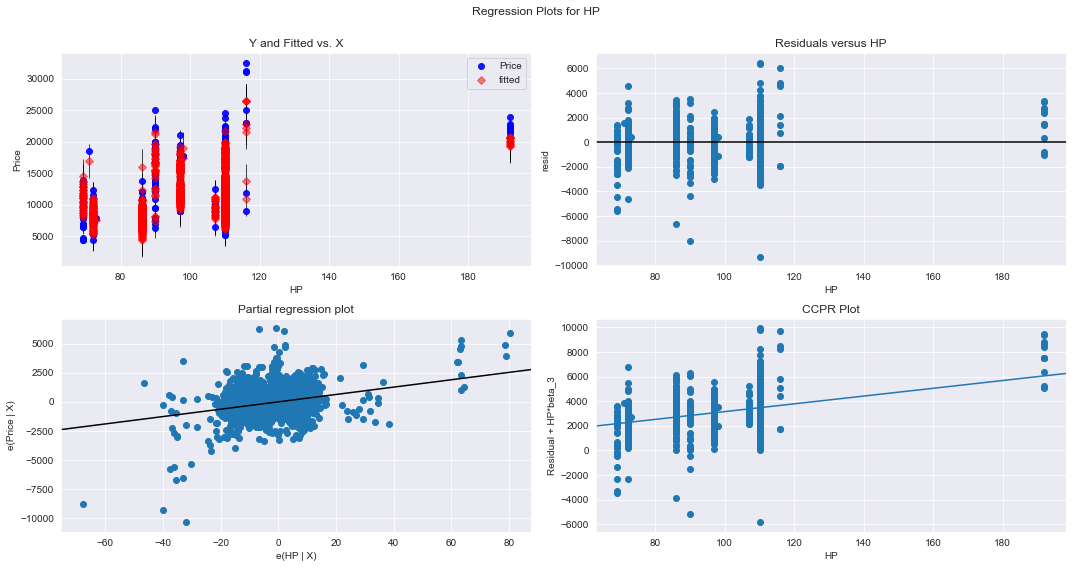

In [81]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting influencers/outliers


# Cooks's Distance

In [82]:
model_influence=model.get_influence()
(c,_) = model_influence.cooks_distance

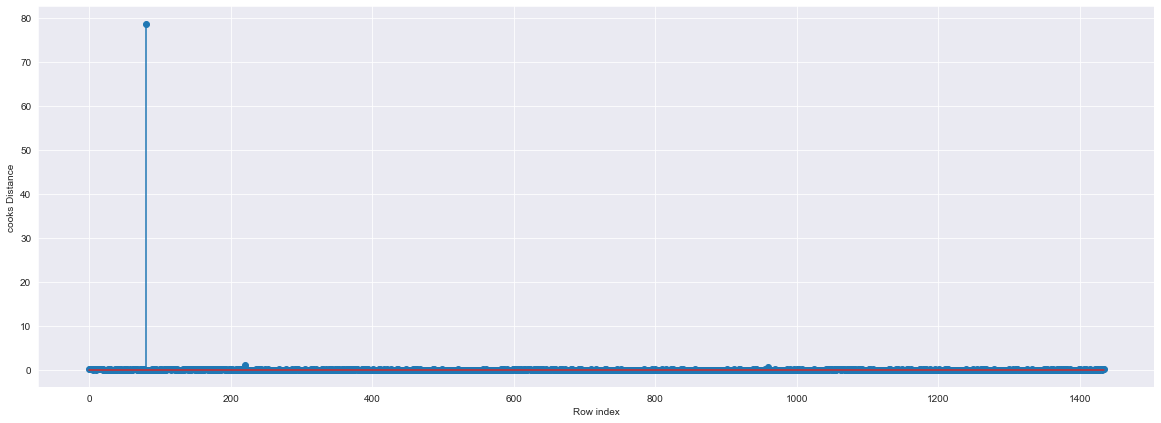

In [83]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [84]:
(np.argmax(c),np.max(c))

(80, 78.72950582250013)

# High influence points

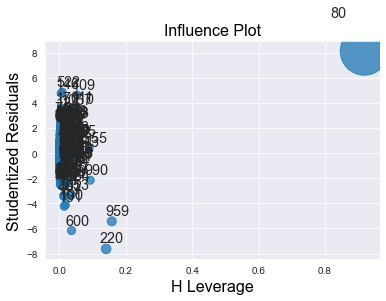

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [86]:
data3.shape

(1435, 11)

In [87]:
k=data3.shape[1]
n=data3.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.025087108013937282

from above plot we can say that 80 is the influencer

In [88]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight,Predicted,Errors
80,18950,25,20019,110,16000,5,5,100,1180,15906.167549,3043.832451


In [89]:
data3.head()

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277


# improving the model

In [90]:
data_new=data3.copy()

In [91]:
dataN=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
dataN

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


# Build model

In [92]:
final_ml_A=smf.ols('Price~Age+KM+C+HP+Doors+Gears+QT+Weight',data=dataN).fit()

In [93]:
final_ml_A.rsquared,final_ml_A.aic

(0.8681163912634053, 24669.363894157)

In [94]:
final_ml_K=smf.ols('Price~KM+C+HP+Doors+Gears+QT+Weight',data=dataN).fit()
final_ml_K.rsquared,final_ml_K.aic

(0.6632572369517671, 26011.594838623605)

R-Square value of final_ml_A is hight compare to final_ml_K.Hence, include the 'Age' so that multi collinearity problem would be resolved

# Cook's distance

In [95]:
model_influence_A = final_ml_A.get_influence()
(c_A,_)=model_influence_A.cooks_distance

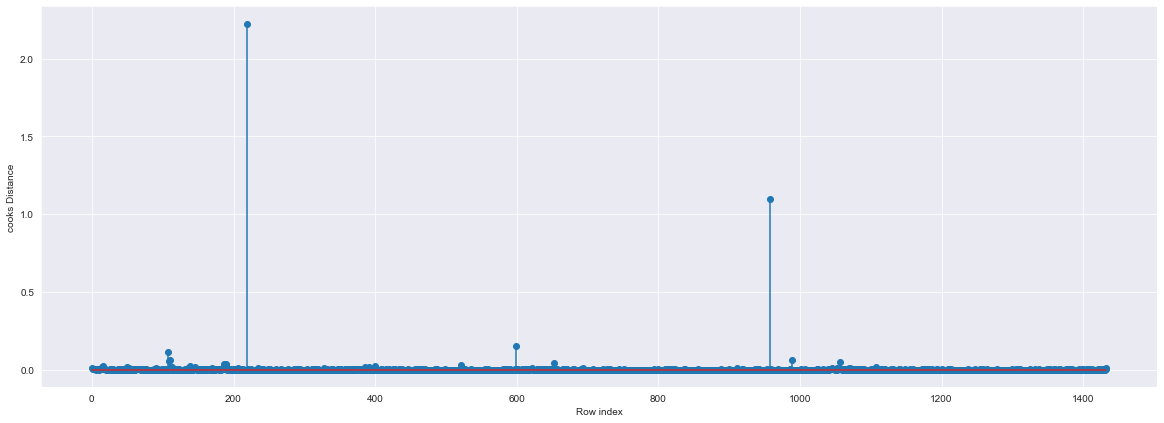

In [96]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dataN)),np.round(c_A,3));
plt.xlabel('Row index')
plt.ylabel('cooks Distance');

In [97]:
(np.argmax(c_A),np.max(c_A))

(219, 2.225351365527174)

In [98]:
dataNN=dataN.drop(dataN.index[219],axis=0)
dataNN

,Price,Age,KM,HP,C,Doors,Gears,QT,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [99]:
while model.rsquared<0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols("Price~+KM+HP+C+Doors+Gears",data=dataNN).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c),np.max(c)
        dataNN=dataNN.drop(dataNN.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataNN
    else:
        final_ml=smf.ols("Price~KM+HP+C+Doors+Gears",data=dataNN).fit()
        final_ml.rsquared,final_ml.aic
        print("Thus model accuracy is improved to",final_ml.rsquared)
     

Thus model accuracy is improved to 0.467235426027116
Thus model accuracy is improved to 0.466146378259263
Thus model accuracy is improved to 0.46319950593302206
Thus model accuracy is improved to 0.46156338305184574
Thus model accuracy is improved to 0.4597426436750671
Thus model accuracy is improved to 0.4594222294339634
Thus model accuracy is improved to 0.45630770627371553
Thus model accuracy is improved to 0.45532388751520747
Thus model accuracy is improved to 0.4534915780942087
Thus model accuracy is improved to 0.45203778747460255
Thus model accuracy is improved to 0.4511788531858295
Thus model accuracy is improved to 0.45104786899481264
Thus model accuracy is improved to 0.4505693111365354
Thus model accuracy is improved to 0.4477155400628815
Thus model accuracy is improved to 0.45308802657276037
Thus model accuracy is improved to 0.4533902077604923
Thus model accuracy is improved to 0.44958454315932916
Thus model accuracy is improved to 0.44652412217882
Thus model accuracy is i

Thus model accuracy is improved to 0.3936148414293731
Thus model accuracy is improved to 0.39364702486442293
Thus model accuracy is improved to 0.39490151316275346
Thus model accuracy is improved to 0.39445788702709694
Thus model accuracy is improved to 0.39404064503151903
Thus model accuracy is improved to 0.39637369809438106
Thus model accuracy is improved to 0.3964534629728106
Thus model accuracy is improved to 0.394062984022568
Thus model accuracy is improved to 0.39381285101596863
Thus model accuracy is improved to 0.3930193294021982
Thus model accuracy is improved to 0.3916950106144911
Thus model accuracy is improved to 0.39349701699724193
Thus model accuracy is improved to 0.39347177788291354
Thus model accuracy is improved to 0.3917366937911071
Thus model accuracy is improved to 0.3921660790671696
Thus model accuracy is improved to 0.3926886286099569
Thus model accuracy is improved to 0.39348626191359537
Thus model accuracy is improved to 0.3934539856558076
Thus model accuracy 

Thus model accuracy is improved to 0.43899622185003206
Thus model accuracy is improved to 0.4405023735601685
Thus model accuracy is improved to 0.44295123236442324
Thus model accuracy is improved to 0.44223393596099747
Thus model accuracy is improved to 0.4428998919099739
Thus model accuracy is improved to 0.4453247901051033
Thus model accuracy is improved to 0.44665498904551715
Thus model accuracy is improved to 0.4481308045253085
Thus model accuracy is improved to 0.4490717583478908
Thus model accuracy is improved to 0.4496713237182687
Thus model accuracy is improved to 0.4500334901662232
Thus model accuracy is improved to 0.45152391068849196
Thus model accuracy is improved to 0.45085293129863746
Thus model accuracy is improved to 0.4526186130994495
Thus model accuracy is improved to 0.4534295946080362
Thus model accuracy is improved to 0.45169564486276637
Thus model accuracy is improved to 0.4518914313245883
Thus model accuracy is improved to 0.45235996779026366
Thus model accuracy 

Thus model accuracy is improved to 0.520216299715888
Thus model accuracy is improved to 0.5218269385347472
Thus model accuracy is improved to 0.5232798819166112
Thus model accuracy is improved to 0.524910421115821
Thus model accuracy is improved to 0.5248490870709415
Thus model accuracy is improved to 0.5240784750002351
Thus model accuracy is improved to 0.5239589555851578
Thus model accuracy is improved to 0.5241750876129609
Thus model accuracy is improved to 0.5244434005590826
Thus model accuracy is improved to 0.5247853209580061
Thus model accuracy is improved to 0.5251341425697905
Thus model accuracy is improved to 0.5254679215043639
Thus model accuracy is improved to 0.5252424351553822
Thus model accuracy is improved to 0.5251099816484932
Thus model accuracy is improved to 0.5236111335680387
Thus model accuracy is improved to 0.5226561306549808
Thus model accuracy is improved to 0.5229541559328856
Thus model accuracy is improved to 0.5210914383356506
Thus model accuracy is improve

Thus model accuracy is improved to 0.5719030415659456
Thus model accuracy is improved to 0.5725324505318323
Thus model accuracy is improved to 0.5713304083276283
Thus model accuracy is improved to 0.571219086625598
Thus model accuracy is improved to 0.5708801336492687
Thus model accuracy is improved to 0.5688820643729948
Thus model accuracy is improved to 0.5676334625939538
Thus model accuracy is improved to 0.5655555021288683
Thus model accuracy is improved to 0.5649212728303196
Thus model accuracy is improved to 0.5625063247640429
Thus model accuracy is improved to 0.5620160942616224
Thus model accuracy is improved to 0.5603163927779198
Thus model accuracy is improved to 0.5603490512016576
Thus model accuracy is improved to 0.5595128656955095
Thus model accuracy is improved to 0.5624761446560756
Thus model accuracy is improved to 0.5632174359695009
Thus model accuracy is improved to 0.5610588329851773
Thus model accuracy is improved to 0.5581126191998211
Thus model accuracy is improv

Thus model accuracy is improved to 0.6730415871630728
Thus model accuracy is improved to 0.6736635468650611
Thus model accuracy is improved to 0.6758131114085754
Thus model accuracy is improved to 0.6780082319199225
Thus model accuracy is improved to 0.6790109909170968
Thus model accuracy is improved to 0.6792205952082722
Thus model accuracy is improved to 0.6809316734994806
Thus model accuracy is improved to 0.682143705680931
Thus model accuracy is improved to 0.6835631193529141
Thus model accuracy is improved to 0.6845340677724506
Thus model accuracy is improved to 0.6846564223373085
Thus model accuracy is improved to 0.6857155845026817
Thus model accuracy is improved to 0.6877923385431784
Thus model accuracy is improved to 0.6872036089286397
Thus model accuracy is improved to 0.689720131043622
Thus model accuracy is improved to 0.6917819142052009
Thus model accuracy is improved to 0.6937765038270457
Thus model accuracy is improved to 0.6950354691810587
Thus model accuracy is improve

Thus model accuracy is improved to 0.7470593275080425
Thus model accuracy is improved to 0.7491110620772599
Thus model accuracy is improved to 0.748606378079989
Thus model accuracy is improved to 0.7502054610026279
Thus model accuracy is improved to 0.7520205063997933
Thus model accuracy is improved to 0.7534359606543749
Thus model accuracy is improved to 0.7546738155748464
Thus model accuracy is improved to 0.755668394717724
Thus model accuracy is improved to 0.7550160302023922
Thus model accuracy is improved to 0.755771613186048
Thus model accuracy is improved to 0.7572353667144236
Thus model accuracy is improved to 0.7570454347540678
Thus model accuracy is improved to 0.757826963545404
Thus model accuracy is improved to 0.7579236246164696
Thus model accuracy is improved to 0.7598309273080175
Thus model accuracy is improved to 0.761679456226704
Thus model accuracy is improved to 0.7629074677937255
Thus model accuracy is improved to 0.7634895782664937
Thus model accuracy is improved t

Thus model accuracy is improved to 0.8555519250371437
Thus model accuracy is improved to 0.8566987526437467
Thus model accuracy is improved to 0.8578151351178
Thus model accuracy is improved to 0.8590491757743425
Thus model accuracy is improved to 0.8585530837071993
Thus model accuracy is improved to 0.8595741409014689
Thus model accuracy is improved to 0.8606460304288005
Thus model accuracy is improved to 0.8618047408331989
Thus model accuracy is improved to 0.8629084294686211
Thus model accuracy is improved to 0.8639204651755787
Thus model accuracy is improved to 0.8638394548167826
Thus model accuracy is improved to 0.8634114872716695
Thus model accuracy is improved to 0.8648305674129063
Thus model accuracy is improved to 0.8655116023817286
Thus model accuracy is improved to 0.8670104178255728
Thus model accuracy is improved to 0.8678762824601585
Thus model accuracy is improved to 0.8693543884143414
Thus model accuracy is improved to 0.8701207693642842
Thus model accuracy is improved

In [108]:
final_ml.rsquared #accuracy is 90%

0.9007040408092425

# predicting new data

In [101]:
new_data=pd.DataFrame({'Age':12,'KM':40000,'HP':80,'C':1200,'Doors':5,'Gears':5,'QT':70,'Weight':1014},index=[0])

In [102]:
new_data

,Age,KM,HP,C,Doors,Gears,QT,Weight
0,12,40000,80,1200,5,5,70,1014


In [103]:
final_ml.predict(new_data)

0    10471.461827
dtype: float64

In [105]:
final_ml.predict(new_data.iloc[0:5,])

0    10471.461827
dtype: float64

In [106]:
pred_y=final_ml.predict(dataNN)

In [107]:
pred_y

0      10147.653909
1       9724.194450
2       9899.452918
3       9942.803284
4       9960.338263
           ...     
282     9844.657121
283    10187.960008
284     9642.669121
285    10266.775473
286     9826.481980
Length: 287, dtype: float64